<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 127.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 147.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 158.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 121.2 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd

Import matplotlib


In [3]:
import matplotlib.pyplot as plt

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [23]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [14]:
#Identify number of duplicate rows in the dataset
number_of_duplicates = df.duplicated().sum()
print(number_of_duplicates)
#display the first few duplicate rows to understand their structure
if number_of_duplicates > 0:
    duplicate_rows = df[df.duplicated(keep=False)]  # keep=False marks all duplicates
    print("\nFirst few duplicate rows:")
    print(duplicate_rows.head())
else:
    print("\n No duplicate rows found in the dataset.")

20

First few duplicate rows:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4   

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [16]:
##1 Identify duplicate rows based on selected columns
#Define subset of columns to check for duplicates
subset_cols = ['MainBranch','Employment','RemoteWork']
#Fetch all duplicate rows (keeping all copies)
duplicates = df[df.duplicated(subset=subset_cols,keep=False)]
#Count duplicates
num_duplicates = len(duplicates)
print(f"Number of duplicate rows based on {subset_cols}:{num_duplicates}")
#2 Analyze which columns frequently match in duplicates
#for duplicate group, check how often other columns match
columns_to_analyze = df.columns.difference(subset_cols) #Exclude the subset columns
#Calculate percentage of duplicates where additional columns match
match_frequency = {}
for col in columns_to_analyze:
    #Group by subset_cols and check if col has identical values within groups
    grouped = duplicates.groupby(subset_cols)[col]
    identical_per_group = grouped.nunique() == 1 #True if all values within groups are identiacal
    match_percentage = identical_per_group.mean() * 100 # % of groups where col matches

    match_frequency[col] = match_percentage
#Sort columns by highest match frequency
match_frequency = pd.Series(match_frequency).sort_values(ascending=False)
print("\n Columns Frequently identical in duplicates (by % of duplicate groups):")
print(match_frequency.head(10)) # Top 10 most frequently matching columns

Number of duplicate rows based on ['MainBranch', 'Employment', 'RemoteWork']:65290

 Columns Frequently identical in duplicates (by % of duplicate groups):
Check                            100.000000
ICorPM                            30.407524
AIThreat                          27.586207
SOAccount                         26.645768
AINextLess integrated             23.824451
SurveyLength                      23.510972
AISelect                          23.510972
AINextMuch more integrated        23.197492
SOPartFreq                        21.003135
AIToolNot interested in Using     21.003135
dtype: float64


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


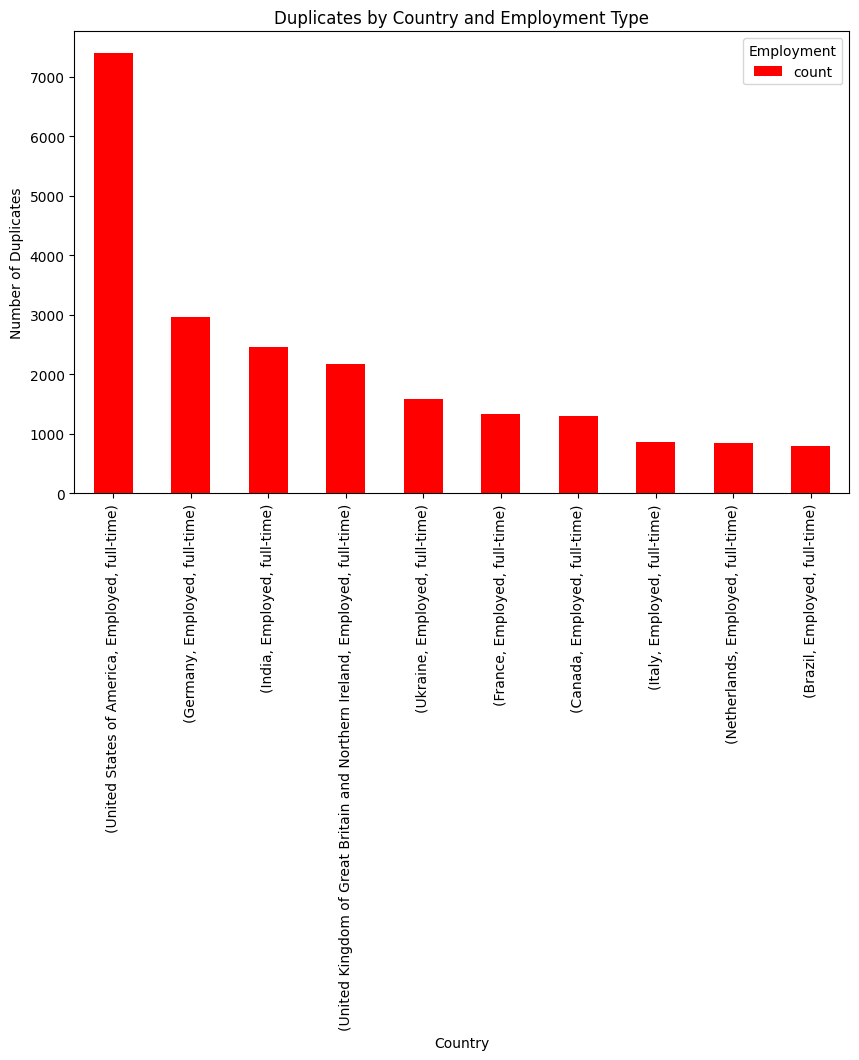

In [26]:
## Count duplicates by country and employment
country_empl_counts = df[['Country','Employment']].value_counts().head(10)

#bar chart
plt.figure(figsize=(10,6))
country_empl_counts.plot(kind='bar',color='red')
plt.title('Duplicates by Country and Employment Type')
plt.xlabel('Country')
plt.ylabel('Number of Duplicates')
#plt.xticks(rotate=45)
plt.legend(title='Employment')
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [28]:
#List all columns and their uniqueness score
uniqueness_scores = {}
for col in df.columns:
    uniqueness_scores[col] = df[col].nunique()/len(df)*100 # % unique values
#Sort by uniqueness'
uniqueness_scores = pd.Series(uniqueness_scores).sort_values(ascending=False)
print("Column uniqueness scores (%):")
print(uniqueness_scores)

Column uniqueness scores (%):
ResponseId                 99.969446
LanguageHaveWorkedWith     36.457522
LanguageWantToWorkWith     34.784668
ToolsTechHaveWorkedWith    30.375666
ToolsTechWantToWorkWith    25.282246
                             ...    
AISelect                    0.004583
SurveyLength                0.004583
ICorPM                      0.003055
TBranch                     0.003055
Check                       0.001528
Length: 114, dtype: float64


In [30]:
key_columns = [
    'ResponseId',        # Unique identifier (if exists)
    'MainBranch',          # Primary role
    'Employment',          # Job type
    'Country',             # Location
    'YearsCodePro',        # Professional experience
    'EdLevel',             # Education level
]

In [31]:
df_clean = df.drop_duplicates(subset=key_columns, keep='first')
print(f"Removed {len(df) - len(df_clean)} duplicates based on:{key_columns}")
print("\nPost-deduplication uniqueness check:")
for col in key_columns:
    print(f"{col}: {df_clean[col].nunique()} unique values")

Removed 20 duplicates based on:['ResponseId', 'MainBranch', 'Employment', 'Country', 'YearsCodePro', 'EdLevel']

Post-deduplication uniqueness check:
ResponseId: 65437 unique values
MainBranch: 5 unique values
Employment: 110 unique values
Country: 185 unique values
YearsCodePro: 52 unique values
EdLevel: 8 unique values


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
